### 1. Load the data set

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [3]:
df = pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.0105,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the data set. (2.5 points)

In [4]:
# Status column is the Target Column to build our ML Models around.

print('Number of Observations in Data Set:', df.shape[0])
print('----------------------------------------------')
print('Number of Attributes of a row in Data Set:', df.shape[1])
print('----------------------------------------------')
print('Types of data assiciated to attributes: ')
print('----------------------------------------------')
df.info()
print('----------------------------------------------')
# Challenges
    # MDVP:Jitter(%) -> Convert to Float type & it has a missing value @185 observation

Number of Observations in Data Set: 195
----------------------------------------------
Number of Attributes of a row in Data Set: 24
----------------------------------------------
Types of data assiciated to attributes: 
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null object
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR           

### Converting MDVP:Jitter(%) Column to Float type, since data is in Float format.

In [5]:
# Convert to numeric format and replace the missing values with median value of the column
df['MDVP:Jitter(%)'] = pd.to_numeric(df['MDVP:Jitter(%)'], errors= 'coerce') #'coerce' - will replace blank with NaN.
df = df.fillna(df.median())
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.007840,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.009680,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.010500,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.009970,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.012840,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.009680,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.003330,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.002900,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.005510,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.005320,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [6]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

### 3. Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

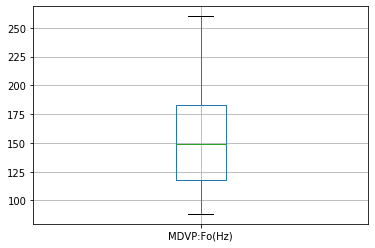

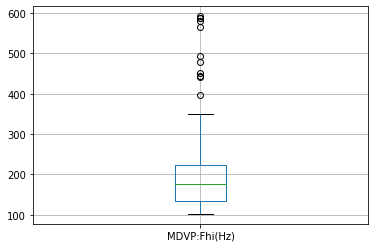

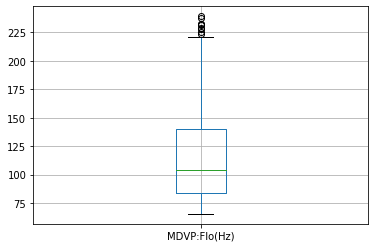

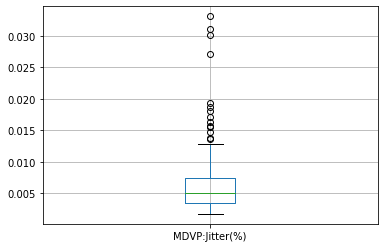

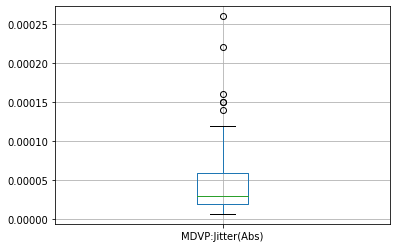

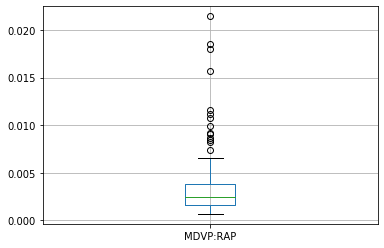

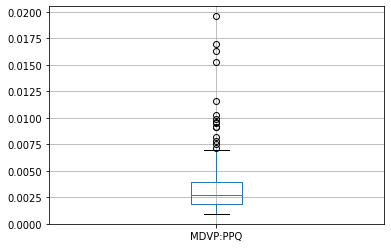

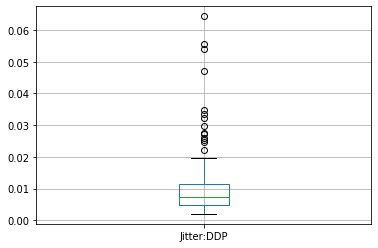

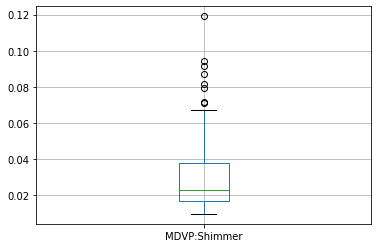

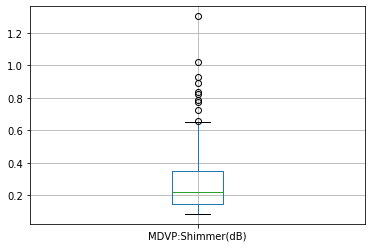

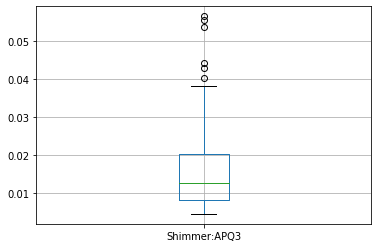

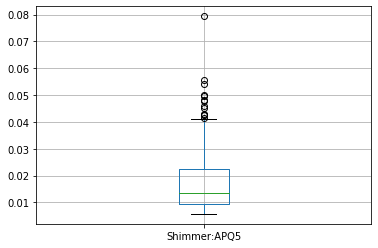

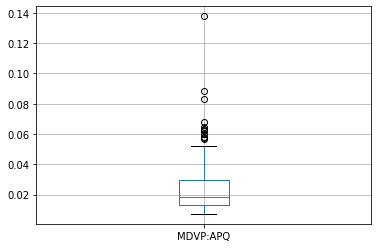

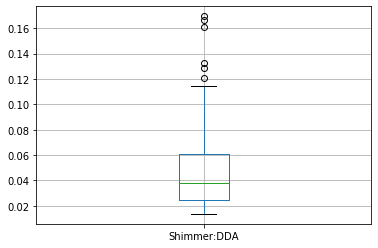

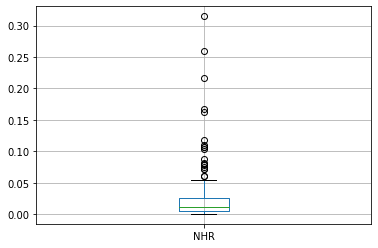

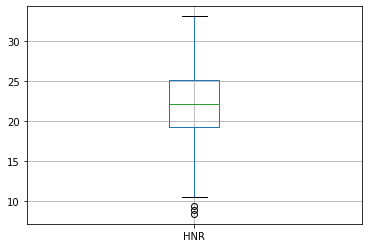

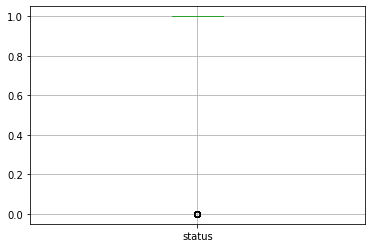

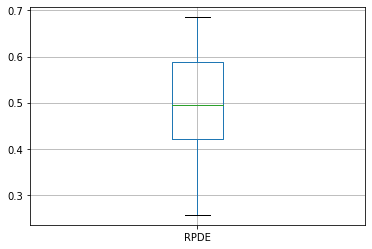

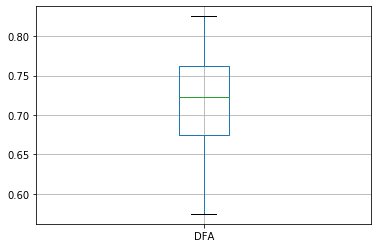

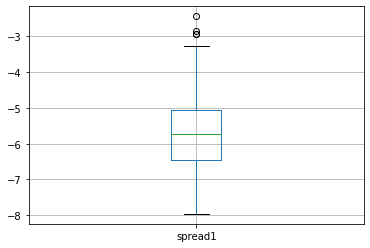

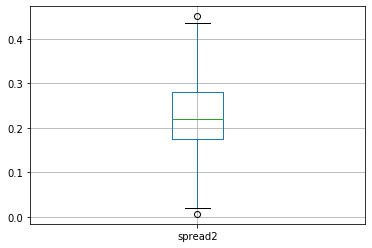

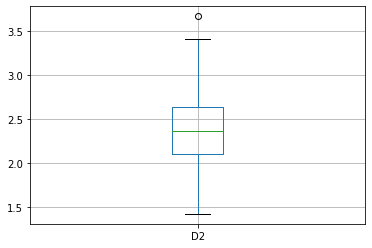

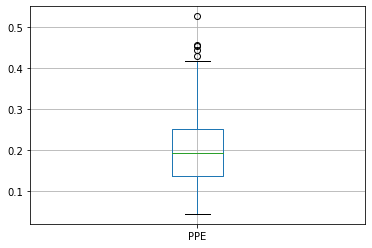

In [7]:
#Uni-Variate Analysis: Using BoxPlot for UniVariate Analysis.
for column in df:
    if (column == 'name'):  #ignoring 'name' column since it is str data & cannot be plotted.
        continue
    plt.figure()
    df.boxplot([column])

In [ ]:
# Analysis on the individual variables,
#   1.   MDVP:Fo(Hz), RPDE & DFA: 
#                   have even distribution of data and has no ouliers.
#
#   2. MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, 
#      MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, spread1 & PPE: 
#                   have more number of high outliers, and distribution might be lightly skewed towards higher numbers.
#
#   3. HNR: has low outliers.

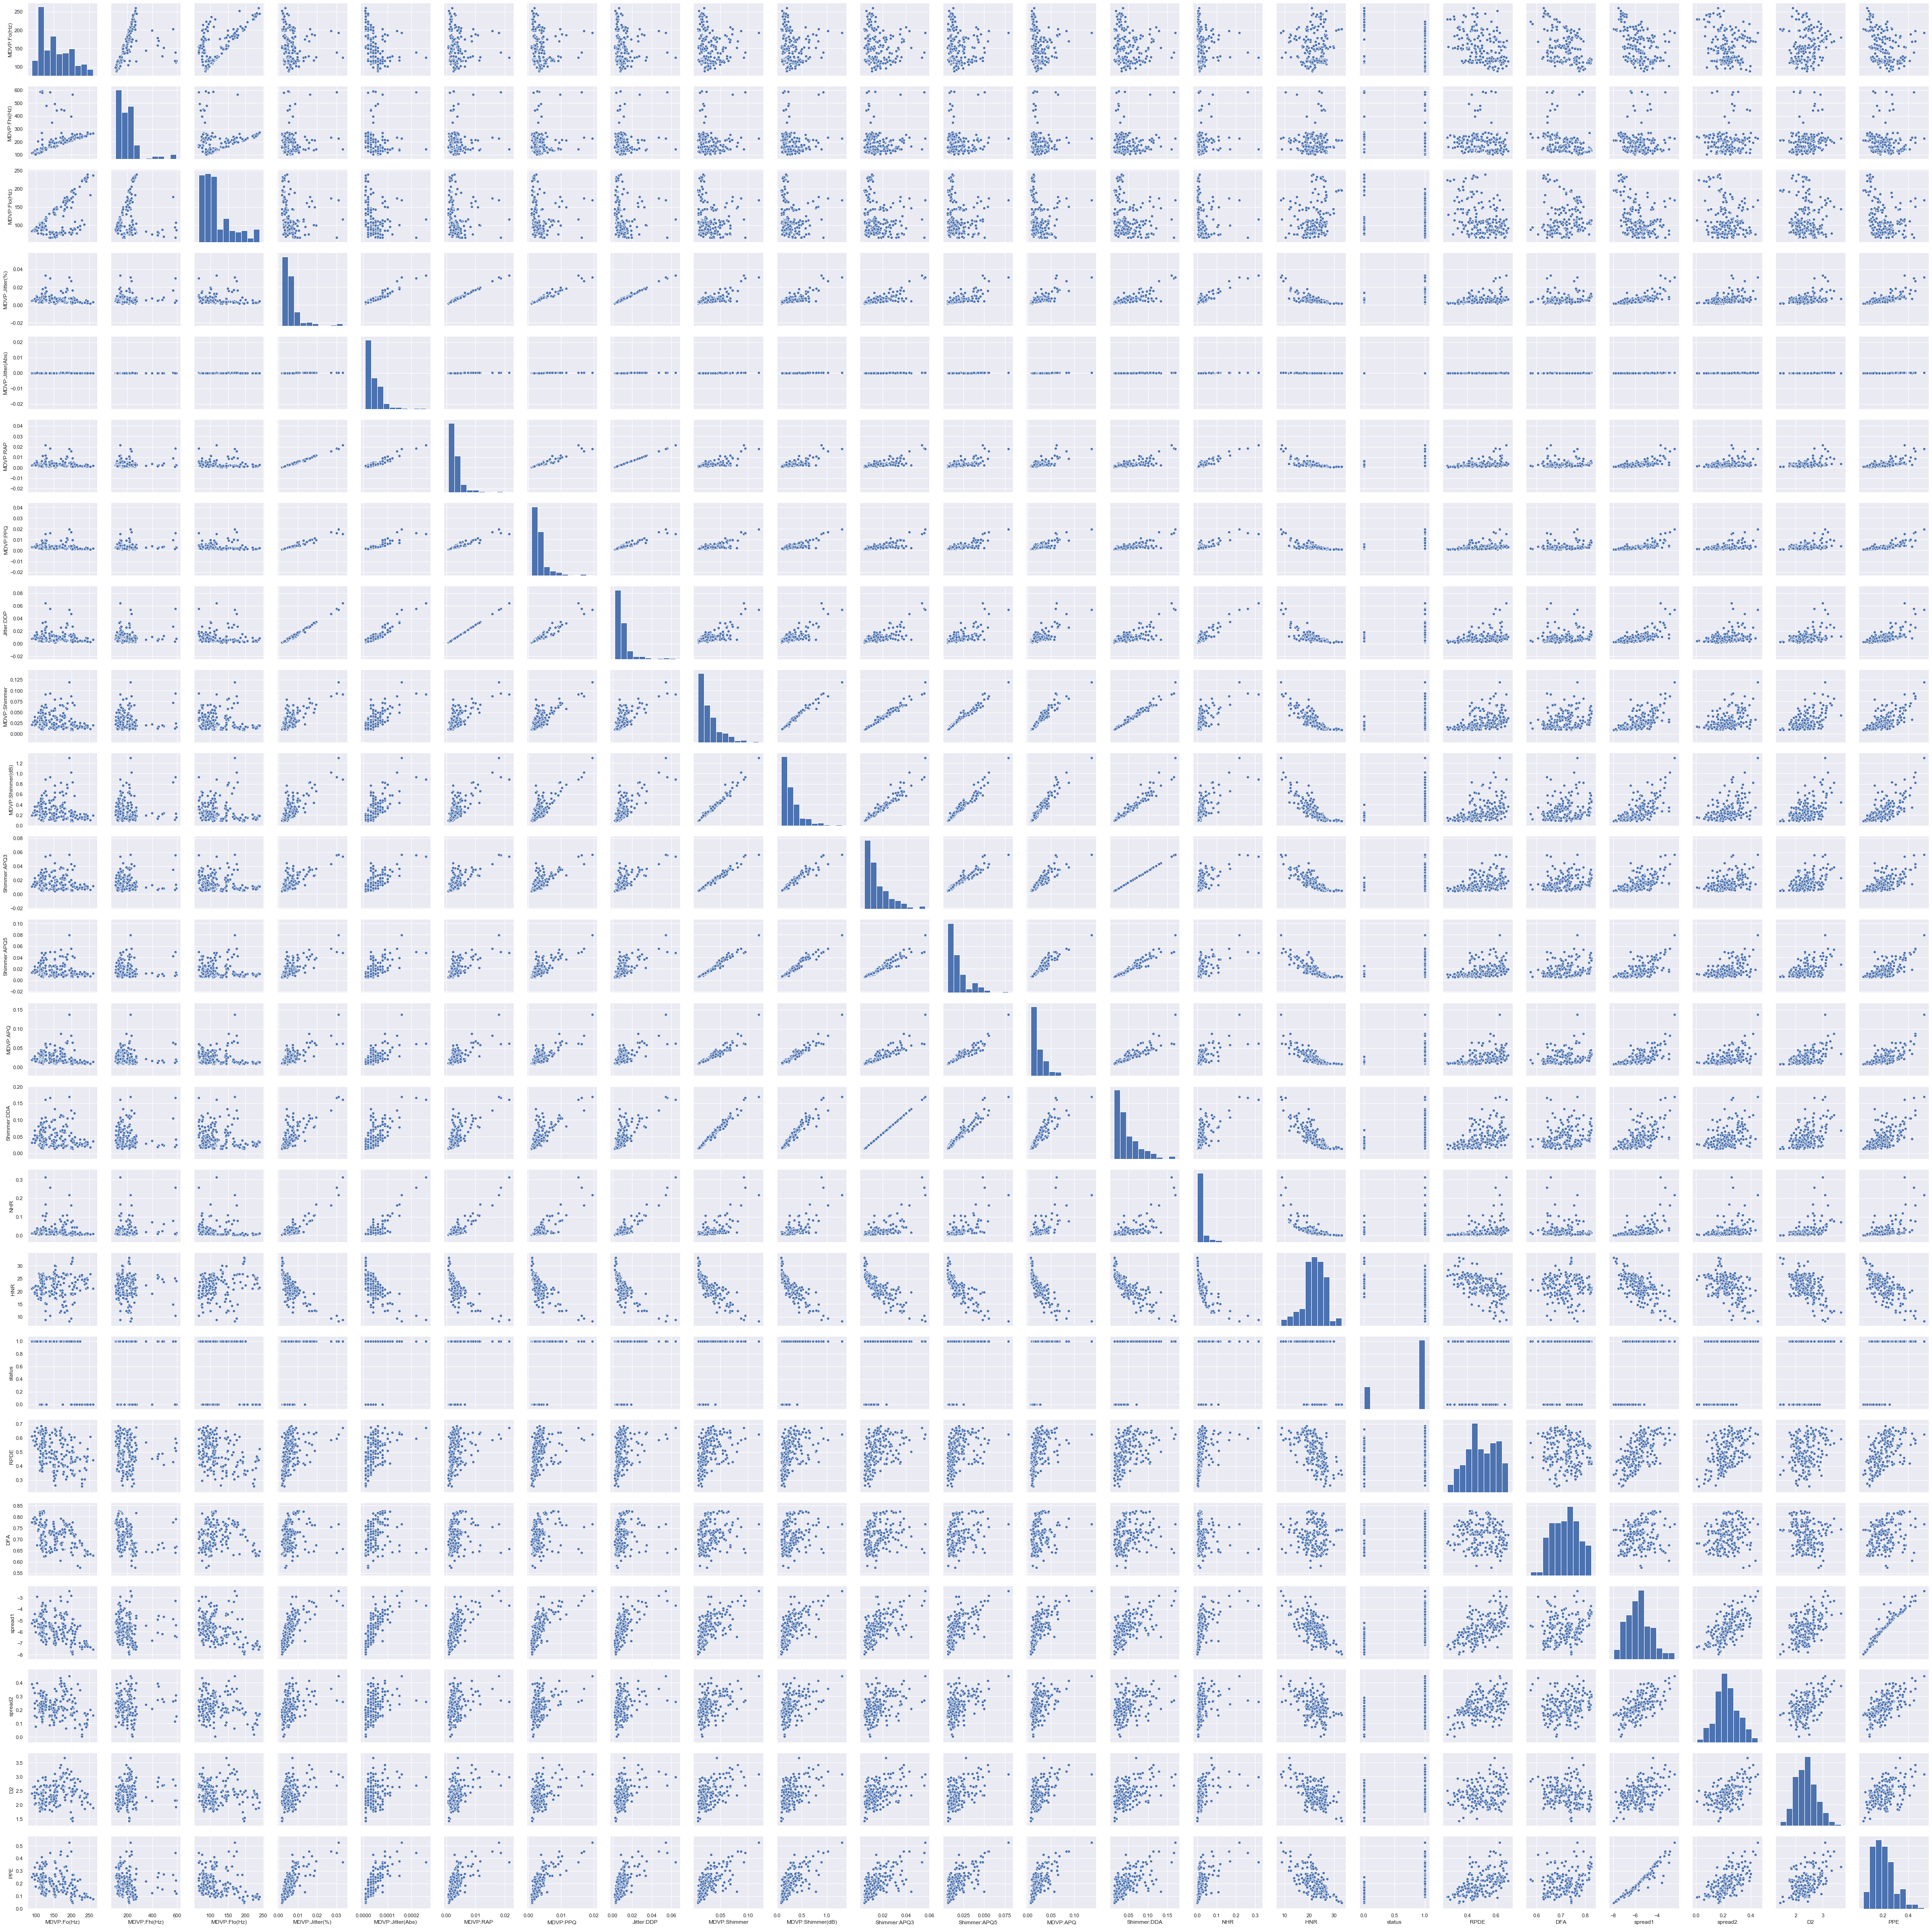

In [55]:
# Bi-Variate Analysis
sns.pairplot(df)

In [8]:
df.corr() 
# We find very strong correlation between columns as mentioned below. We can consider these as good condidates for
#    predicting values.
#          1. MDVP:Jitter(Abs) with MDVP:Jitter(%)
#          2. MDVP:RAP with (MDVP:Jitter(%),  MDVP:Jitter(Abs) )
#          4. MDVP:PPQ with (MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP)
#          5. Jitter:DDP with (MDVP:Jitter(%) , MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ)
#          6. MDVP:Shimmer(dB) with MDVP:Shimmer    so on so forth we can consider for the columns correlation.

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118773,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.101456,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.140142,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118773,0.101456,-0.140142,1.000000,0.935885,0.990154,0.974309,0.990155,0.768817,0.804046,...,0.746276,0.906903,-0.728149,0.276860,0.361608,0.097877,0.693822,0.384887,0.432793,0.721831
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935885,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990154,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974309,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990155,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.768817,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804046,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


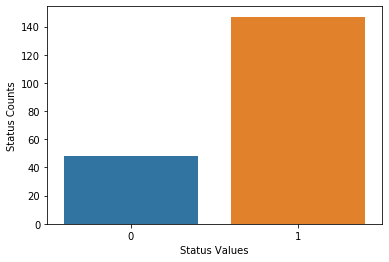

In [9]:
sns.countplot(df['status'].values)
plt.xlabel('Status Values')
plt.ylabel('Status Counts')
plt.show()

### 4. Split the data set into training and test set in the ratio of 70:30 (Training:Test)

In [10]:
#     We have to drop un-necessary columns from the dataframe. 
#     We can drop 'name' from the dataframe since it doesn't provide any significant value for model building.
#      - 'status' column is also dropped from X-axis.

X = df.drop(['name', 'status'], axis= 1)
y = df['status']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [12]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (136, 22)
X_test (59, 22)
y_train (136,)
y_test (59,)


### 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [13]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state = 100)

In [14]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

### 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab. (7.5 points)

In [15]:
y_predict = dt_model.predict(X_test)
print('Predicted Values of y: ', y_predict)

Predicted Values of y:  [1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1]


In [16]:
print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test , y_test))

1.0
0.8813559322033898


[[13  6]
 [ 1 39]]


Text(0.5, 15.0, 'Predicted label')

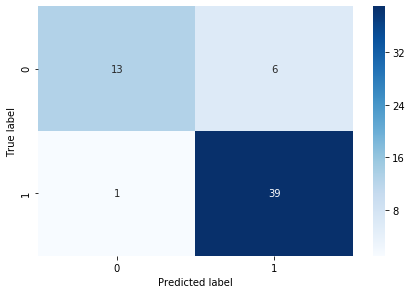

In [17]:
conf_matrix = metrics.confusion_matrix(y_test, y_predict)
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix,cmap = 'Blues', annot=True, fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [18]:
print("Accuracy Score of Regularized Model: ", accuracy_score(y_test, y_predict))

print("Recall of Regularized Model: ", recall_score(y_test, y_predict))

print("Precision Score of Regularized Model: ", precision_score(y_test, y_predict))

Accuracy Score of Regularized Model:  0.8813559322033898
Recall of Regularized Model:  0.975
Precision Score of Regularized Model:  0.8666666666666667


In [19]:
# Cross tab
pd.crosstab(y_test, y_predict, rownames=['actual'], colnames=['predictions'])

predictions,0,1
actual,,
0,13,6
1,1,39


### 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

In [20]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, min_samples_leaf= 4)
reg_dt_model.fit(X_train, y_train)
reg_y_pred_d2_l4 = reg_dt_model.predict(X_test)
reg_dt_model.score(X_test , y_test)

0.7966101694915254

In [21]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf= 4)
reg_dt_model.fit(X_train, y_train)
reg_y_pred_d3_l5 = reg_dt_model.predict(X_test)
reg_dt_model.score(X_test , y_test)

0.8983050847457628

In [23]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf= 4)
reg_dt_model.fit(X_train, y_train)
reg_y_pred_d5_l5 = reg_dt_model.predict(X_test)
reg_dt_model.score(X_test , y_test)

0.9152542372881356

In [24]:
# At max_depath = 5 & with min_samples_leaf we are observing 
#     increase in model score value for the regularized Decision Tree Model.

[[15  4]
 [ 1 39]]


Text(0.5, 15.0, 'Predicted label')

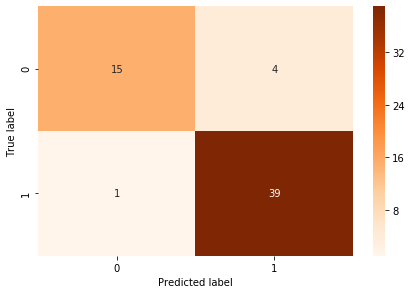

In [25]:
reg_conf_matrix = metrics.confusion_matrix(y_test, reg_y_pred_d5_l5)
print(reg_conf_matrix)
sns.heatmap(reg_conf_matrix,cmap = 'Oranges', annot=True, fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [26]:
print("Accuracy Score of Regularized Model: ", accuracy_score(y_test, reg_y_pred_d5_l5))

print("Recall of Regularized Model: ", recall_score(y_test, reg_y_pred_d5_l5))

print("Precision Score of Regularized Model: ", precision_score(y_test, reg_y_pred_d5_l5))


# Comments on the Regularized Model:
# 1. We are seeing an improvement in the Accuracy of the Model 
# 2. Recall score is the same.
# 3. Precision with which the Positives are predicted is increased. 

Accuracy Score of Regularized Model:  0.9152542372881356
Recall of Regularized Model:  0.975
Precision Score of Regularized Model:  0.9069767441860465


###  8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

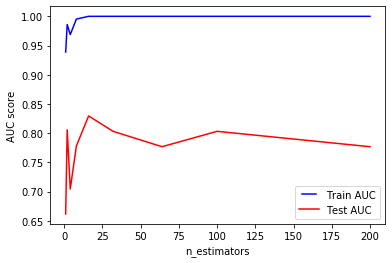

In [98]:
from sklearn.metrics import roc_curve, auc
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred_rf = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
# From the above graph, we can stop at n_estimators = 20, since above which we are seeing a 
# dip in the test performance.